In [5]:
import rasterio
data = rasterio.open("OACI_23_L93_E100.jp2")

# Les coordonnées des quatre coins de la carte en Lambert 93
# (L93 dans le nom de fichier => projection Lambert93)
# https://epsg.io/2154
data.bounds

BoundingBox(left=470000.0, bottom=5950000.0, right=870000.0, top=6350000.0)

In [11]:
from PIL import Image
import numpy as np

# Chargement du fond de carte, c'est un peu long
fname = 'OACI_23_L93_E100.jp2'
image = Image.open(fname)
arr = np.asarray(image)

In [12]:
image

OSError: decoder jpeg2k not available

<PIL.Jpeg2KImagePlugin.Jpeg2KImageFile image mode=RGB size=8000x8000 at 0x162C5E10>

In [13]:
arr

array(<PIL.Jpeg2KImagePlugin.Jpeg2KImageFile image mode=RGB size=8000x8000 at 0x162C5E10>,
      dtype=object)

In [1]:
import matplotlib

In [2]:
import pandas as pd

# la trajectoire
traj_file = "Trajectoire Lasbordes-Montauban.txt"
with open(traj_file) as fh:
    traj = eval("".join(p.strip() for p in fh.readlines()))
    traj = pd.DataFrame.from_records(traj, columns=['latitude', 'longitude'])

traj.head()

,latitude,longitude
0,43.588000,1.499000
1,43.588367,1.498899
2,43.588735,1.498797
3,43.589102,1.498696
4,43.589470,1.498595


In [3]:
from traffic.core import Flight
from datetime import datetime

# on peut écrire Flight(traj) et le plot fonctionnerait
# mais la bibliothèque est contente
# si on a une colonne altitude et une colonne timestamp
now = datetime.now()
f = Flight(traj.assign(altitude=0, timestamp=now))

C:\Users\Esther\AppData\Roaming\Python\Python36\site-packages\traffic\data\adsb\decode.py:27: UserWarning: Install pyModeS>=2.0 from https://github.com/junzis/pyModeS
  warnings.warn("Install pyModeS>=2.0 from https://github.com/junzis/pyModeS")
C:\Users\Esther\Anaconda3\lib\imp.py:172: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  module = _load(spec)


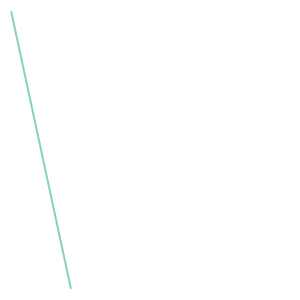

In [4]:
# plus il y a de colonnes, plus l'affichage est riche...
f

In [7]:
data.bounds

BoundingBox(left=470000.0, bottom=5950000.0, right=870000.0, top=6350000.0)

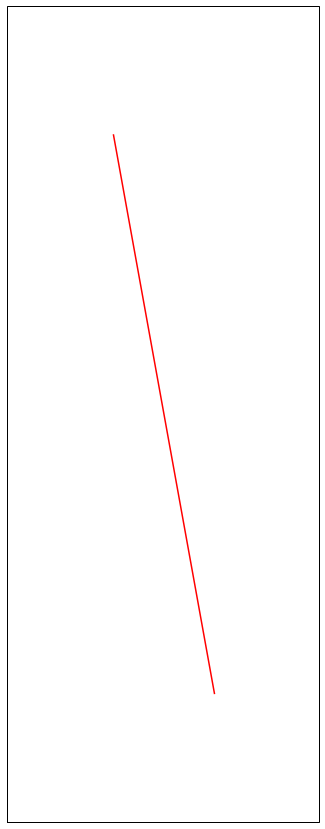

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

from traffic.drawing import Lambert93
from traffic.data import airac

with plt.style.context('traffic'):
    fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=Lambert93()))

    #ax.imshow(  # fond de carte
    #    arr[::-1],
    #    extent=(
    #        data.bounds.left, data.bounds.right,
    #        data.bounds.bottom, data.bounds.top),
    #    alpha=.3  # transparence
    #)
    
    # essayez différents extent
    ax.set_extent((1, 2, 43.5, 44))
    ax.set_extent(f.extent())

    # essayez différents paramètres, linestyle='dashed', linewidth=3 par exemple
    rep = f.plot(ax, color='red')
    
    fig.savefig("example.pdf")

In [11]:
# pour l'affichage interactif (hors notebook), on peut effacer les lignes,
# comme avec d'autres exemples qu'on peut trouver en ligne.
# ce qui sort du f.plot c'est la même chose que ce qui sort d'un plot classique
rep